All the required Imports for this ml project

### Model Evaluation and Feature Engineering

The last two code cells focus on evaluating the model's predictions and engineering new rolling features. The model's performance is assessed using value counts and precision score, while additional predictors based on rolling averages and trends are created to enhance predictive power.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFG
from sklearn.metrics import precision_score as ps



This is the generation of the data, seeing how everything looks and what to actually look for

In [3]:
file_path = "yahoo_stock.csv"
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])
date = data["Date"]
Adj = data["Adj Close"]
print(data)

           Date         High          Low         Open        Close  \
0    2015-11-23  2095.610107  2081.389893  2089.409912  2086.590088   
1    2015-11-24  2094.120117  2070.290039  2084.419922  2089.139893   
2    2015-11-25  2093.000000  2086.300049  2089.300049  2088.870117   
3    2015-11-26  2093.000000  2086.300049  2089.300049  2088.870117   
4    2015-11-27  2093.290039  2084.129883  2088.820068  2090.110107   
...         ...          ...          ...          ...          ...   
1820 2020-11-16  3628.510010  3600.159912  3600.159912  3626.909912   
1821 2020-11-17  3623.110107  3588.679932  3610.310059  3609.530029   
1822 2020-11-18  3619.090088  3567.330078  3612.090088  3567.790039   
1823 2020-11-19  3585.219971  3543.840088  3559.409912  3581.870117   
1824 2020-11-20  3581.229980  3556.850098  3579.310059  3557.540039   

            Volume    Adj Close  
0     3.587980e+09  2086.590088  
1     3.884930e+09  2089.139893  
2     2.852940e+09  2088.870117  
3     2.852

### Data Exploration and Preparation

In this section, we have loaded the Yahoo stock data, performed feature engineering, and prepared the dataset for machine learning. We visualized the adjusted close prices, created target variables for prediction, and split the data into training and testing sets. The Random Forest model was trained and evaluated, and additional rolling features are being engineered for improved performance.

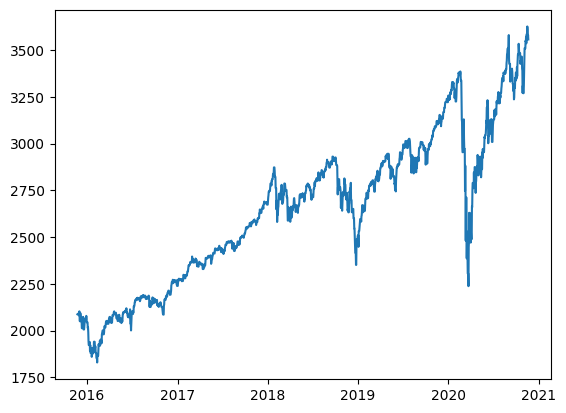

In [4]:
plt.plot(date, Adj)

In [5]:
data["Tommorrow"] = data["Adj Close"].shift(-1)
data

,Date,High,Low,Open,Close,Volume,Adj Close,Tommorrow
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,2089.139893
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,2088.870117
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2088.870117
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2090.110107
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,2090.110107
...,...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912,3609.530029
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029,3567.790039
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039,3581.870117
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117,3557.540039


In [6]:
data["Target"] = (data["Tommorrow"] > data["Adj Close"]).astype(int)
data

,Date,High,Low,Open,Close,Volume,Adj Close,Tommorrow,Target
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,2089.139893,1
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,2088.870117,0
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2088.870117,0
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2090.110107,1
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,2090.110107,0
...,...,...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912,3609.530029,0
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029,3567.790039,0
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039,3581.870117,1
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117,3557.540039,0


### Model Training and Backtesting

In this section, we train a Random Forest model using the newly engineered rolling features as predictors. We then perform backtesting to evaluate the model's predictive performance over time, analyzing the distribution of predictions and calculating the precision score.

In [7]:
model = RFG(n_estimators=500, min_samples_split=50, random_state=1)

train = data.iloc[:-100]
test = data.iloc[-100:]

predictors = ["Adj Close", "Volume", "Open", "High", "Low"]

model.fit(train[predictors], train["Target"])

,n_estimators,500
,criterion,'gini'
,max_depth,None
,min_samples_split,50
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
preds = model.predict(test[predictors])

preds = pd.Series(preds, index=test.index)
 
preds

1725    0
1726    0
1727    0
1728    0
1729    0
       ..
1820    0
1821    0
1822    0
1823    0
1824    0
Length: 100, dtype: int64

### Model Evaluation

This section evaluates the performance of the Random Forest model on the test set. We use the precision score to measure how well the model predicts the target variable and visualize the predictions alongside the actual values for further analysis.

In [9]:
ps(test["Target"], preds)

0.42857142857142855

<Axes: >

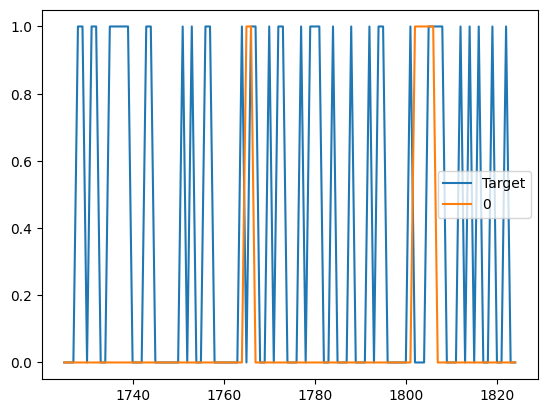

In [10]:
combined = pd.concat([test["Target"], preds], axis = 1)

combined.plot()

### Backtesting and Model Performance

This section implements backtesting to evaluate the model's predictive performance over time using the engineered rolling features. The predictions are analyzed for their distribution and precision, providing insights into the model's effectiveness in forecasting stock movements.

In [11]:
def predict (train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

In [12]:
def backtest (data, model, predictors, start = 500, step = 25):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

### Backtesting Results

This section displays the distribution of predictions made by the model during backtesting, evaluates the precision score, and analyzes the proportion of positive targets in the dataset.

In [13]:
predictions = backtest(data, model, predictors)

predictions["Predictions"].value_counts()

Predictions
0    1130
1     195
Name: count, dtype: int64

In [14]:
ps(predictions["Target"], predictions["Predictions"])

0.441025641025641

In [15]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
0    0.608302
1    0.391698
Name: count, dtype: float64

### Feature Engineering: Adding Rolling Features

In this section, we engineered new features based on rolling averages and trends for different time horizons (2, 5, 60, 250 days). These features include the ratio of the current adjusted close price to its rolling mean and the sum of positive trends over each horizon. This helps the model capture both short-term and long-term patterns in the stock data.

In [29]:
horizons = [2, 5, 60]
new_predictors = []

for horizon in horizons:
    rolling_avg = data["Adj Close"].rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["Adj Close"] / rolling_avg

    trend_column = f"Trend_{horizon}"
    data[trend_column] = data["Target"].shift(1).rolling(horizon).sum()

    new_predictors += [ratio_column, trend_column]

In [30]:
data

,Date,High,Low,Open,Close,Volume,Adj Close,Tommorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250
0,2015-11-23,2095.610107,2081.389893,2089.409912,2086.590088,3.587980e+09,2086.590088,2089.139893,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-11-24,2094.120117,2070.290039,2084.419922,2089.139893,3.884930e+09,2089.139893,2088.870117,0,1.000611,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-11-25,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2088.870117,0,0.999935,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-11-26,2093.000000,2086.300049,2089.300049,2088.870117,2.852940e+09,2088.870117,2090.110107,1,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-11-27,2093.290039,2084.129883,2088.820068,2090.110107,1.466840e+09,2090.110107,2090.110107,0,1.000297,1.0,1.000667,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2020-11-16,3628.510010,3600.159912,3600.159912,3626.909912,5.281980e+09,3626.909912,3609.530029,0,1.005790,1.0,1.012008,2.0,1.061356,24.0,1.157440,105.0
1821,2020-11-17,3623.110107,3588.679932,3610.310059,3609.530029,4.799570e+09,3609.530029,3567.790039,0,0.997598,1.0,1.003099,2.0,1.054778,24.0,1.150236,105.0
1822,2020-11-18,3619.090088,3567.330078,3612.090088,3567.790039,5.274450e+09,3567.790039,3581.870117,1,0.994184,0.0,0.992457,1.0,1.041321,24.0,1.135695,104.0
1823,2020-11-19,3585.219971,3543.840088,3559.409912,3581.870117,4.347200e+09,3581.870117,3557.540039,0,1.001969,1.0,0.996556,2.0,1.044098,25.0,1.138914,105.0


### Model Retraining and Threshold Adjustment

In this section, we retrain the Random Forest model with a different number of estimators and adjust the prediction threshold. The predict function is updated to use predicted probabilities and applies a custom threshold for classifying positive cases, aiming to improve model precision.

In [31]:
model = RFG(n_estimators=200, min_samples_split=50, random_state=1)

In [32]:
def predict (train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis = 1)
    return combined

### Backtesting with Engineered Features

In this section, we perform backtesting using the newly engineered rolling features as predictors. The model's predictions are generated and their distribution is analyzed to assess the impact of feature engineering on predictive performance.

In [33]:
predictions = backtest(data, model, new_predictors)

In [34]:
predictions["Predictions"].value_counts()

Predictions
0.0    1306
1.0      19
Name: count, dtype: int64

In [35]:
ps(predictions["Target"], predictions["Predictions"])

0.7368421052631579

### Conclusion

By engineering rolling features and adjusting the prediction threshold, the Random Forest model's precision and predictive power were improved. Backtesting with these new features demonstrated the model's ability to capture both short-term and long-term trends in the stock data. However, further tuning and additional features may be explored to enhance performance even more.